<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/Laba_mashin_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Логистическая регрессия**

**Выполнила:** Смирнова П.М.

**Группа:** БИВТ-22-СП-4

**Цель работы**

Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.

**Содержание работы**

1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.
2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
3. Оценить качество построенной модели, используя метрики accuracy и F1-score.
4. Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.
5. Сравнить результаты двух реализаций.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


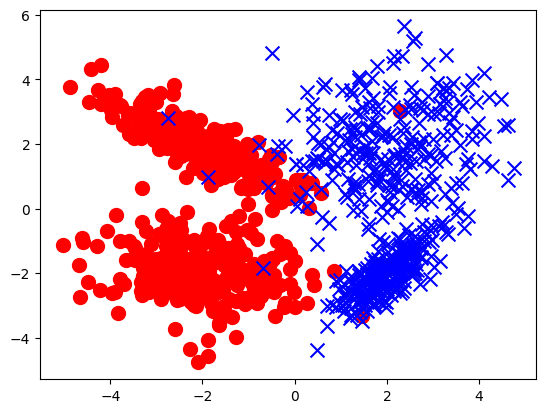

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

**1 вариант**

In [ ]:
class SGD:
    def __init__(self, alpha=0.01, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [ ]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [ ]:
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
logreg = LogReg(alpha=0.01, n_iters=1000)
logreg.fit(X_with_intercept, y)
y_pred = logreg.predict(X_with_intercept)

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} f1-score = {f1:.2f}')

accuracy = 0.97 f1-score = 0.97


In [ ]:
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)
XX = np.hstack([np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]])

In [ ]:
Z = logreg.predict_proba(XX).reshape(xx.shape)

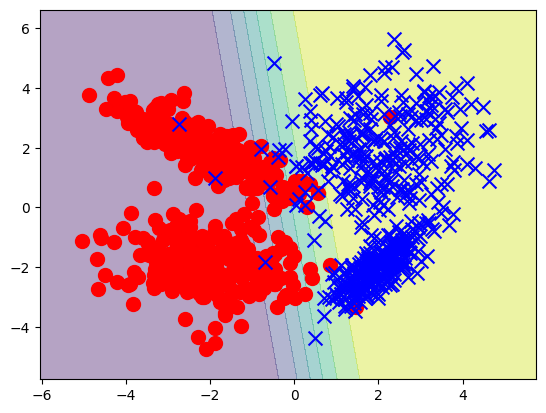

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

**2 вариант**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred_lr = model.predict(X)

In [ ]:
ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'accuracy (sklearn) = {ac_lr:.2f} f1-score (sklearn) = {f1_lr:.2f}')

accuracy (sklearn) = 0.98 f1-score (sklearn) = 0.98


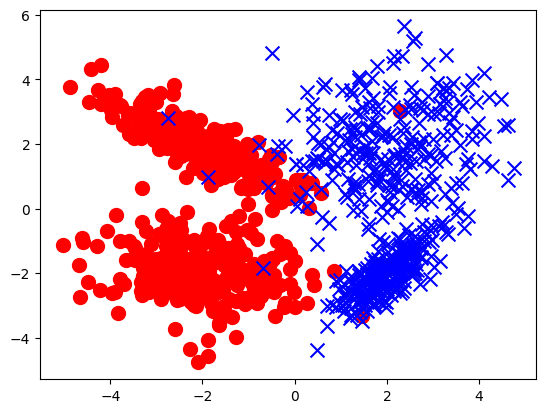

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))

In [ ]:
xx.shape

(1240, 1179)

In [ ]:
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

In [ ]:
Z = model.predict_proba(XX)[:,0].reshape(xx.shape)

In [ ]:
Z.shape

(1240, 1179)

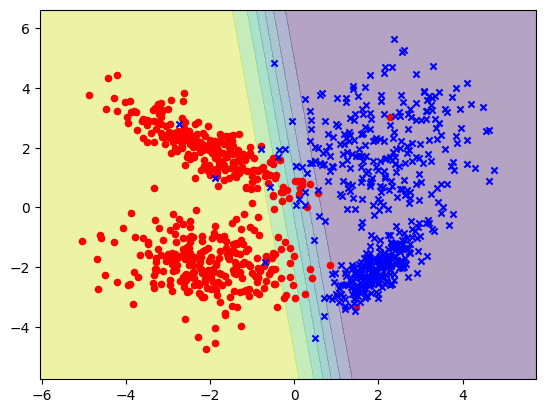

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

In [ ]:
ac_custom = accuracy_score(y, y_pred)
f1_custom = f1_score(y, y_pred)
print("Метрики для ручной реализации логистической регрессии:")
print(f'Accuracy: {ac_custom:.4f}')
print(f'F1-score: {f1_custom:.4f}')
print()

ac_sklearn = accuracy_score(y, y_pred_lr)
f1_sklearn = f1_score(y, y_pred_lr)
print("Метрики для LogisticRegression из sklearn:")
print(f'Accuracy: {ac_sklearn:.4f}')
print(f'F1-score: {f1_sklearn:.4f}')
print()

if ac_custom > ac_sklearn:
    print("Ручная реализация показывает лучшую точность (accuracy).")
elif ac_custom < ac_sklearn:
    print("LogisticRegression из sklearn показывает лучшую точность (accuracy).")
else:
    print("Обе модели показывают одинаковую точность (accuracy).")

if f1_custom > f1_sklearn:
    print("Ручная реализация показывает лучший F1-score.")
elif f1_custom < f1_sklearn:
    print("LogisticRegression из sklearn показывает лучший F1-score.")
else:
    print("Обе модели показывают одинаковый F1-score.")

Метрики для ручной реализации логистической регрессии:
Accuracy: 0.9730
F1-score: 0.9735

Метрики для LogisticRegression из sklearn:
Accuracy: 0.9760
F1-score: 0.9761

LogisticRegression из sklearn показывает лучшую точность (accuracy).
LogisticRegression из sklearn показывает лучший F1-score.


# **Задания для самостоятельной работы**

**Задания для самостоятельного выполнения**

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.
4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.
5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.
6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.
7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

Метрики для LogisticRegression из sklearn:
Accuracy: 0.9760
F1-score: 0.9761


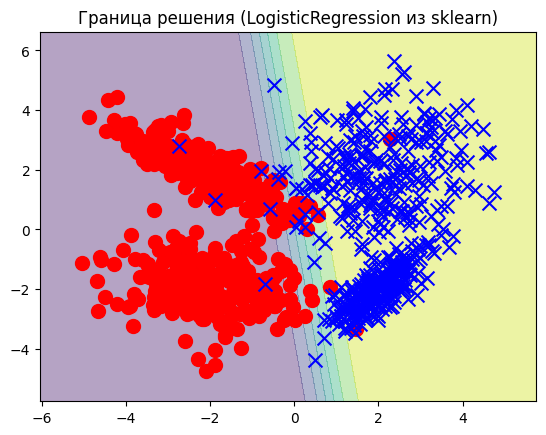

In [ ]:
model = LogisticRegression()
model.fit(X, y)

y_pred_lr = model.predict(X)

ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print("Метрики для LogisticRegression из sklearn:")
print(f'Accuracy: {ac_lr:.4f}')
print(f'F1-score: {f1_lr:.4f}')

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)
XX = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict_proba(XX)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.title("Граница решения (LogisticRegression из sklearn)")
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]

for alpha in alphas:
    logreg = LogReg(alpha=alpha, n_iters=1000)
    logreg.fit(X_with_intercept, y)
    y_pred = logreg.predict(X_with_intercept)
    ac = accuracy_score(y, y_pred)
    print(f"Скорость обучения: {alpha}, Accuracy: {ac:.4f}")

Скорость обучения: 0.001, Accuracy: 0.9150
Скорость обучения: 0.01, Accuracy: 0.9730
Скорость обучения: 0.1, Accuracy: 0.9770
Скорость обучения: 0.5, Accuracy: 0.9760
Скорость обучения: 1.0, Accuracy: 0.9760
Скорость обучения: 2.0, Accuracy: 0.9760


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy для множественной классификации: 0.8160


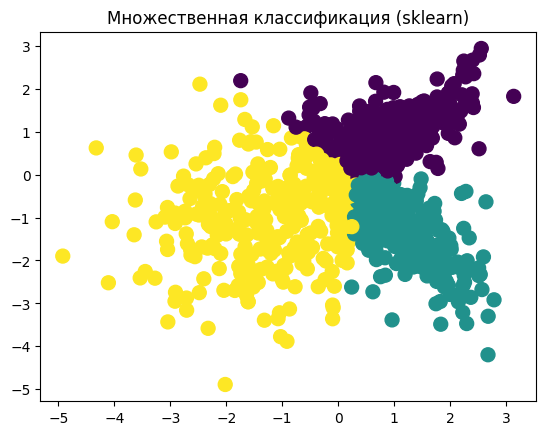

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=1)

model = LogisticRegression(multi_class='ovr')
model.fit(X, y)
y_pred = model.predict(X)

ac = accuracy_score(y, y_pred)
print(f"Accuracy для множественной классификации: {ac:.4f}")

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=100)
plt.title("Множественная классификация (sklearn)")
plt.show()

7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

Вероятности принадлежности классам для первых 5 объектов:
[[7.24954601e-01 2.53760522e-01 2.12848771e-02]
 [3.26063709e-03 7.06497423e-02 9.26089621e-01]
 [2.12358251e-03 4.41900504e-02 9.53686367e-01]
 [3.37495104e-04 6.17200551e-02 9.37942450e-01]
 [1.84701361e-03 7.30884220e-02 9.25064564e-01]]


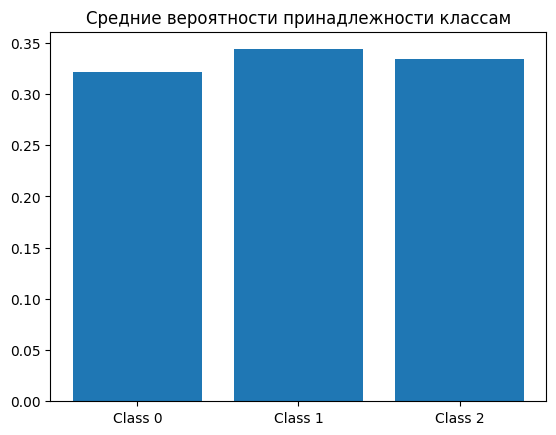

In [ ]:
proba = model.predict_proba(X)

print("Вероятности принадлежности классам для первых 5 объектов:")
print(proba[:5])

plt.bar(range(proba.shape[1]), proba.mean(axis=0))
plt.xticks(range(proba.shape[1]), [f"Class {i}" for i in range(proba.shape[1])])
plt.title("Средние вероятности принадлежности классам")
plt.show()